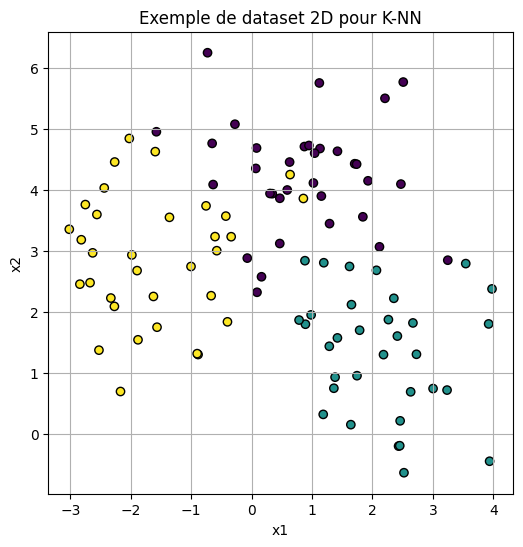

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1.0)

# Visualisation
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Exemple de dataset 2D pour K-NN")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


Classe prédite pour le nouvel échantillon [[0 4]]: 0


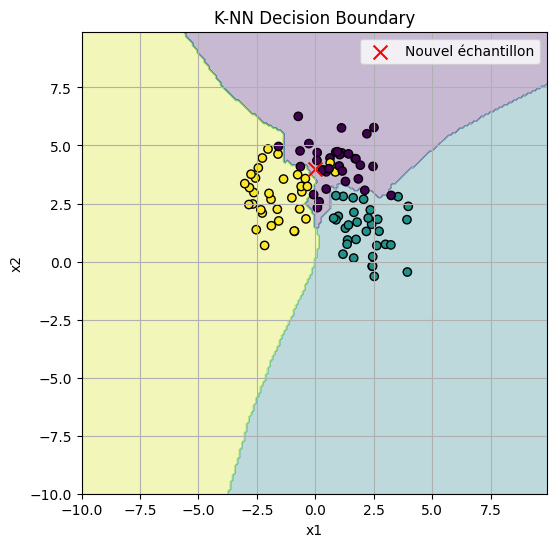

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
# Prédiction sur un nouvel échantillon
new_sample = np.array([[0, 4]])
predicted_class = knn.predict(new_sample)
print(f"Classe prédite pour le nouvel échantillon {new_sample}: {predicted_class[0]}")
# Visualisation de la décision
xx, yy = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.scatter(new_sample[0, 0], new_sample[0, 1], c='red', marker='x', s=100, label='Nouvel échantillon')
plt.title("K-NN Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


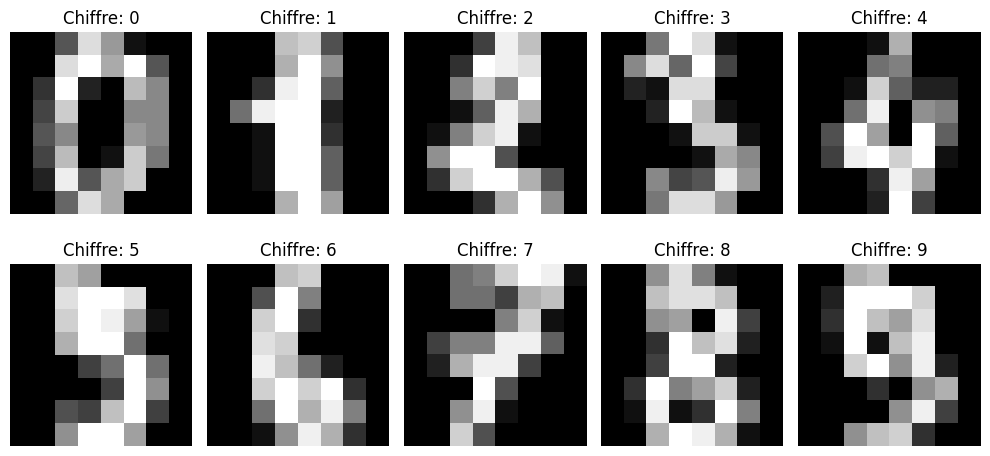

In [55]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

digits = load_digits()

X = digits.data
y = digits.target

# Visualisation de quelques chiffres
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Chiffre: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print(X.min(), X.max())
X_scaled = X / 16.0
print(X_scaled.min(), X_scaled.max())

0.0 16.0
0.0 1.0


Précision du modèle K-NN sur le jeu de test: 0.99


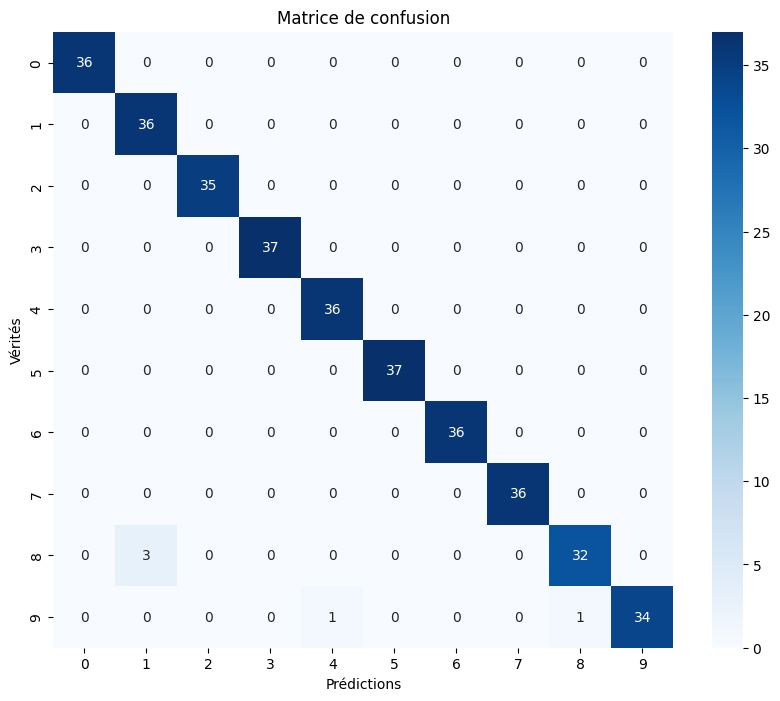

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f"Précision du modèle K-NN sur le jeu de test: {accuracy:.2f}")

# Visualisation de la matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()
print(classification_report(y_test, y_pred, target_names=digits.target_names.astype(str)))


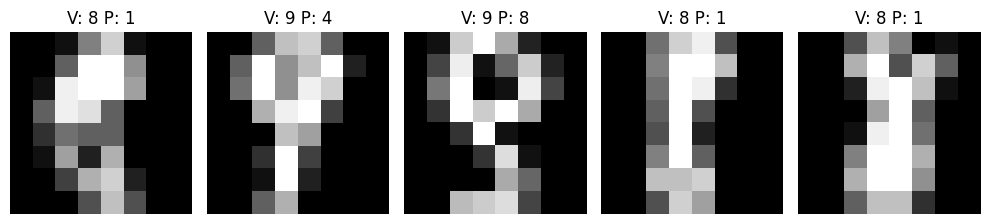

In [ ]:
# Trouver les indices des prédictions incorrectes
incorrect_indices = np.where(y_test != y_pred)[0]

# Afficher les chiffres mal prédits
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):  # Afficher les 10 premiers chiffres mal prédits
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"V: {y_test[idx]} P: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

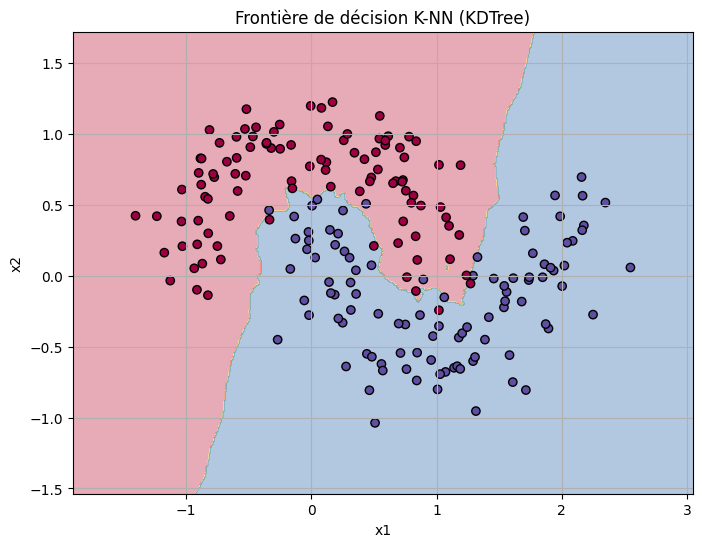

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Dataset
X, y = make_moons(n_samples=200, noise=0.2)

# Classifieur K-NN avec KDTree
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn.fit(X, y)

# Grille de points pour visualiser les prédictions
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prédiction pour chaque point de la grille
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisation
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
plt.title("Frontière de décision K-NN (KDTree)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


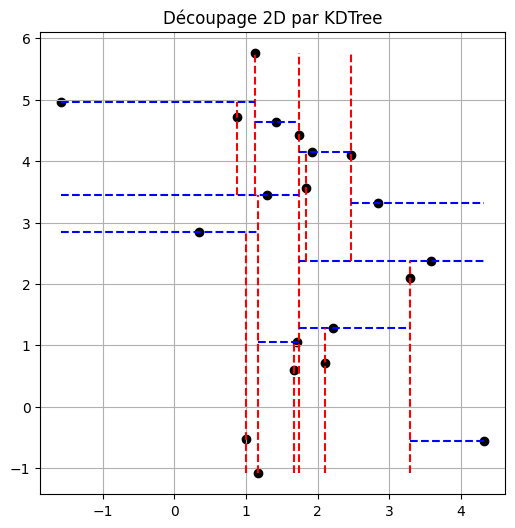

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KDTree

# Génère un dataset simple
X, y = make_blobs(n_samples=20, centers=2, random_state=0)

# Construction du KDTree
tree = KDTree(X, leaf_size=1)

# Fonction pour tracer les divisions du KDTree
def plot_kdtree_divisions(ax, X, depth=0, bounds=None):
    if len(X) == 0:
        return
    k = X.shape[1]
    axis = depth % k
    X_sorted = X[X[:, axis].argsort()]
    median_idx = len(X_sorted) // 2
    median_point = X_sorted[median_idx]

    if bounds is None:
        bounds = [X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()]

    if axis == 0:
        # Ligne verticale
        ax.plot([median_point[0], median_point[0]], [bounds[2], bounds[3]], 'r--')
        plot_kdtree_divisions(ax, X_sorted[:median_idx], depth+1, [bounds[0], median_point[0], bounds[2], bounds[3]])
        plot_kdtree_divisions(ax, X_sorted[median_idx+1:], depth+1, [median_point[0], bounds[1], bounds[2], bounds[3]])
    else:
        # Ligne horizontale
        ax.plot([bounds[0], bounds[1]], [median_point[1], median_point[1]], 'b--')
        plot_kdtree_divisions(ax, X_sorted[:median_idx], depth+1, [bounds[0], bounds[1], bounds[2], median_point[1]])
        plot_kdtree_divisions(ax, X_sorted[median_idx+1:], depth+1, [bounds[0], bounds[1], median_point[1], bounds[3]])

# Visualisation
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c='k')
plot_kdtree_divisions(ax, X)
plt.title("Découpage 2D par KDTree")
plt.grid(True)
plt.show()
